In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import pysal
import shapely.geometry
from shapely.geometry import Point, Polygon

Das hier ist ein erstes Kennenlernen der Library GeoPandas. 

# Arbeit mit den wunderbaren GeoPandas

In [79]:
#Importieren wir die vorgefertige Weltkarte. Unter Variabel ist nun alle Länder der Welt, bzw. ihre Polygone, bzw. alle Punkte, die für die Polygone notwendig sind, abgelegt. 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [80]:
#Es sind aber nicht nur Polygone abgelegt, sondern auch die geschätzte Bevölkerung, 
#der jeweilige Kontinent eines Landes, der NAme des Landes, der jeweilige ISO Code 
#und das Bruttosozialprodukt
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
pop_est       177 non-null float64
continent     177 non-null object
name          177 non-null object
iso_a3        177 non-null object
gdp_md_est    177 non-null float64
geometry      177 non-null object
dtypes: float64(2), object(4)
memory usage: 8.4+ KB


In [81]:
#Das sieht so aus: 
world.head() #Mit .head() werden die ersten 5 Zeilen angezeigt. Wie wir das von Pandas schon kennen.

pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0  Asia           Afghanistan           AFG    22270.0      
1  12799293.0  Africa         Angola                AGO    110300.0     
2  3639453.0   Europe         Albania               ALB    21810.0      
3  4798491.0   Asia           United Arab Emirates  ARE    184300.0     
4  40913584.0  South America  Argentina             ARG    573900.0     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [82]:
#Wenn wir eine Zahl mitgeben, in head(), wird die ensprechende Anzahl Zeilen angezeigt.
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923, 62.23065148300589 35.27066396742229, 62.98466230657661 35.40404083916762, 63.19353844590035 35.85716563571891, 63.98289594915871 36.0079574651466, 64.5464791197339 36.31207326918427, 64.74610517767741 37.1118177353333, 65.58894778835784 37.30521678318564, 65.74563073106683 37.66116404881207, 66.21738488145934 37.39379018813392, 66.51860680528867 37.36278432875879, 67.07578209825962 37.35614390720929, 67.82999962755952 37.14499400486469, 68.13556237170138 37.02311513930431, 68.85944583524594 37.3443358424306, 69.19627282092438 37.15114350030743, 69.51878543485796 37.60899669041342, 70.11657840361033 37.58822276463209, 70.27057417184014 37.73516469985402, 70.3763041523093 38.13839590102752, 70.80682050973289 38.48628164321642, 71.34813113799026 38.25890534113216, 71.23940392444817 37.95326508234189, 71.54191775908478 37.90577444106565, 71.44869347523024 37.06564484308052, 71.84463829945059 36.73817129164692, 72.1930408059624 36.94828766534567, 72.63688968291729 37.04755809177836, 73.26005577992501 37.495256862939, 73.9486959166465 37.4215662704908, 74.98000247589542 37.4199901393059, 75.15802778514092 37.13303091078912, 74.57589277537298 37.02084137628346, 74.06755171091783 36.83617564548845, 72.92002485544447 36.72000702569632, 71.84629194528392 36.50994232842986, 71.26234826038575 36.0743875188578, 71.49876793812109 35.650563259416, 71.61307620635071 35.15320343682286, 71.11501875192164 34.73312571872223, 71.15677330921346 34.34891144463215, 70.8818030129884 33.98885590263852, 69.93054324735959 34.02012014417511, 70.3235941913716 33.35853261975839, 69.68714725126486 33.10549896904124, 69.26252200712256 32.5019440780883, 69.31776411324256 31.90141225842444, 68.92667687365767 31.62018911389207, 68.55693200060932 31.71331004488202, 67.79268924344478 31.58293040620963, 67.68339358914747 31.30315420178142, 66.93889122911847 31.30491120047935, 66.38145755398602 30.73889923758645, 66.34647260932442 29.88794342703618, 65.04686201361611 29.47218069103191, 64.35041873561852 29.56003062592809, 64.14800215033125 29.34081920014597, 63.55026085801117 29.46833079682617, 62.54985680527278 29.31857249604431, 60.87424848820879 29.82923899995261, 61.78122155136344 30.73585032808124, 61.69931440618083 31.37950613049267, 60.94194461451113 31.54807465262875, 60.86365481958897 32.18291962333443, 60.53607791529078 32.98126882581157, 60.96370039250601 33.52883230237626, 60.52842980331158 33.67644603121801, 60.80319339380745 34.40410187431986, 61.21081709172574 35.65007233330923))"
1,12799293.0,Africa,Angola,AGO,110300.0,"(POLYGON ((16.32652835456705 -5.877470391466218, 16.57317996589614 -6.622644545115094, 16.86019087084523 -7.222297865429979, 17.08999596524717 -7.545688978712477, 17.47297000496229 -8.068551120641658, 18.13422163256905 -7.987677504104866, 18.46417565275269 -7.847014255406478, 19.01675174324967 -7.98824594486014, 19.16661339689608 -7.738183688999726, 19.41750247567322 -7.155428562044278, 20.03772301604022 -7.11636117923166, 20.09162153492062 -6.943090101756951, 20.60182295093833 -6.939317722199689, 20.51474816252653 -7.299605808138665, 21.72811079273976 -7.290872491081316, 21.74645592620337 -7.920084730667114, 21.94913089365204 -8.305900974158305, 21.80180138518796 -8.908706556842986, 21.8751819190424 -9.523707777548566, 22.20875328948642 -9.89479623783653, 22.15526818206433 -11.08480112065378, 22.40279829274243 -10.99307545333569, 22.83734541188477 -11.01762175867434, 23.45679080576747 -10.86786345789248, 23.91221520355575 -10.92682626713754, 24.01789350759262 -11.23729827234712, 23.90415368011824 -11.72228158940634, 24.0799052263429 -12.19129688888731, 23.93092207204538 -12.56584767013882, 24.0161365088947 -12.91104623784855, 21.93388634612595 -12.89843718836936, 21.88784264495388 -16.08031015387689, 22.56247846852429 -16.89845142992183, 23.21504845550609 -17.52311614346596, 21.3771761410456 -17

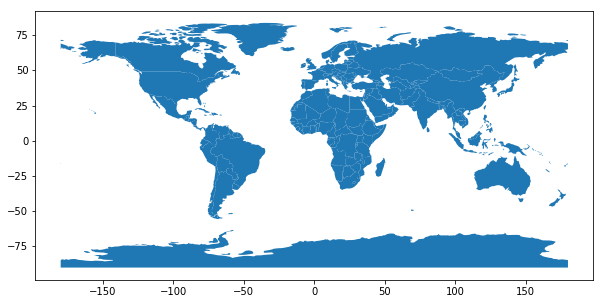

In [83]:
#Wenn wir ein Geopandas File plotten, mit dem Befehl .plot(), wird nur die Spalte,
#die geometry heisst, berücksichtigt. Und so ergibt sich folgendes Bild.
world.plot(figsize=(10,20)) #Mit der Option figsize wird die Grösse der Karte
                            #angezeigt. Berücksichtigt wird allerdings nur der
                            #erste Wert. In diesem Fall 10. Er bestimmt die Höhe.

In [60]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


In [84]:
#Schauen wir uns diese Polygonspalte etwas genauer an. Damit wir mehr sehen,
#können wir bei Pandas und GeoPandas die Anzeige verändern. Per Default werden 
#die ersten 50 Spalten anzeigt. Schauen wir die ersten 300 an.
pd.set_option('display.max_colwidth',300)

In [85]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923, 62.23065148300589 35.27066396742229, 62.98466230657661 35.40404083916762, 63.19353844590035 35.85716563571891, 63.98289594915871 36.0079574651466, 64.5464791197339 36.31207326918427, 64.74610517767741 37.1118177353333, 65.58894778835784 37.305216783..."
1,12799293.0,Africa,Angola,AGO,110300.0,"(POLYGON ((16.32652835456705 -5.877470391466218, 16.57317996589614 -6.622644545115094, 16.86019087084523 -7.222297865429979, 17.08999596524717 -7.545688978712477, 17.47297000496229 -8.068551120641658, 18.13422163256905 -7.987677504104866, 18.46417565275269 -7.847014255406478, 19.01675174324967 -..."
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361, 20.4631750830992 41.51508901627534, 20.60518191903736 41.08622630468523, 21.0200403174764 40.84272695572588, 20.99998986174722 40.58000397395398, 20.67499677906363 40.43499990494303, 20.61500044117275 40.11000682225938, 20.15001590341052 39.62499766..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111, 51.75744062684419 24.29407298430547, 51.79438927593287 24.01982615813251, 52.57708051942561 24.17743927662271, 53.40400678896015 24.15131684009917, 54.00800092958758 24.12175792082822, 54.69302371604863 24.79789236093509, 55.43902469261414 25.439145..."
4,40913584.0,South America,Argentina,ARG,573900.0,"(POLYGON ((-65.50000000000003 -55.19999999999996, -66.45000000000002 -55.25000000000002, -66.95992000000004 -54.89680999999997, -67.56244000000001 -54.87000999999996, -68.63334999999998 -54.86949999999995, -68.63401022758316 -52.63637045887446, -68.25 -53.09999999999997, -67.75000000000003 -53.8..."


In [86]:
#oder alle. Mit -1 sagen wir Geopandas, dass er bis zum letzten Zeichen alles anzeigen soll.
pd.set_option('display.max_colwidth',-1)

In [87]:
world.head()

pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0  Asia           Afghanistan           AFG    22270.0      
1  12799293.0  Africa         Angola                AGO    110300.0     
2  3639453.0   Europe         Albania               ALB    21810.0      
3  4798491.0   Asia           United Arab Emirates  ARE    184300.0     
4  40913584.0  South America  Argentina             ARG    573900.0     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [88]:
#Ihr seht. Es werden sehr viele Punkte angezeigt. Jede einzige Richtungsänderung einer Ländergrenze, um
#genau zu sein. 

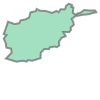

In [89]:
#Was passiert, wenn wir nur eine einzige Zelle anzeigen. In diesem fall die aller erste. Afghanistan 
#wird direkt visualisiert. 
world['geometry'][0]

In [90]:
#Gehen wir mit der Weltkarte etwas weiter. Rechnen wir das GDP pro Kopf im Jahr aus. 
world['gdp_per_cap'] = world['gdp_md_est'] / world['pop_est']
world['gdp_per_cap'] = world['gdp_per_cap'] * 1000000 #Wir rechnen mal 1000000, weil 
                                                   #in der Tabelle die Bevölkerung absolut anzeiget ist,
                                                   #GDP aber in Millionen

In [91]:
world['gdp_per_cap'].head()

0    784.154930  
1    8617.663491 
2    5992.658787 
3    38407.907819
4    14027.126052
Name: gdp_per_cap, dtype: float64

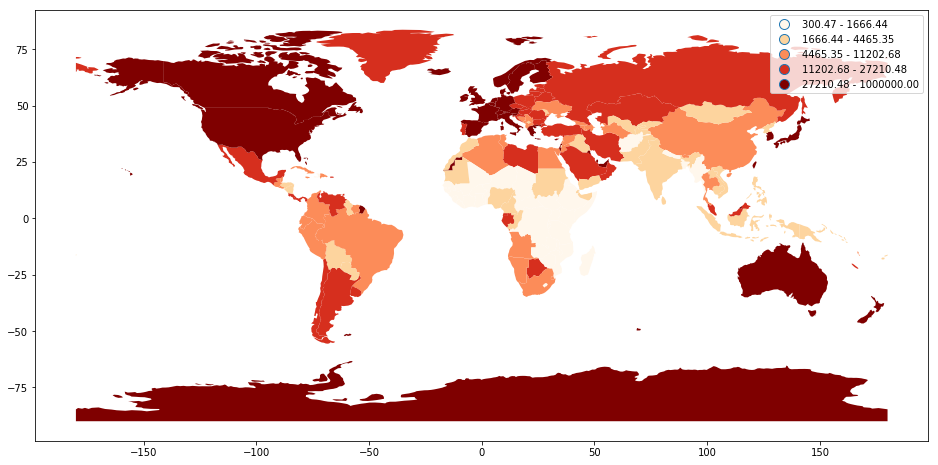

In [92]:
#Nun zeigen wir die ganze Welt an, und Färben die KArte entsprechend ein. Figsize kennen wir schon.
#Damit zeigen die Grösse der Karte ein. Mit "column" zeigen wir an, welche Spalte für die Einfärbung
#berücksichtigt werden soll. Mit "cmap" bestimmen wir den Farbverlauf. Hier können viele andere
#Farbverläufe bestimmt werden: https://matplotlib.org/examples/color/colormaps_reference.html
#Mit scheme wird bestimmt, in wieviele Teile farblich ab. 
#Dann kann man die Daten mit "scheme" anderartig kategorisieren: 
#types = ['classless', quantiles', 'equal_interval', 'fisher_jenks']. Je nach Datensatz
#macht eine betimmte kategorisierung mehr oder weniger Sinn.
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles', figsize=(16, 20), legend=True);
#Und mir diesem Befehl speichern wir die Karte, unsere Kreation, als .pdf ab. 
plt.savefig('welt.pdf')

In [66]:
!ls

01 APIs und Authentifikation (Google API)-Copy1.ipynb
01 APIs und Authentifikation (Google API).ipynb
02 Aufgaben Tag 16.ipynb
03 Geopandas.ipynb
GEN_A4_GEMEINDEN_SEEN_2018_F
GEN_A4_GEMEINDEN_SEEN_2018_F_WGS84_.geojson
SHAPEFILE_LV03_LN02
Umwandlung WGS84 <-> LV03.ipynb
italrest_allcities.csv
italrest_top10cities.csv
italrests.csv
shapePLZ
switzerland.pdf
vietnamesische.csv
welt.pdf


In [93]:
#Mit dem "!" wechseln wir auf die Commandline und nun können wir 
!open "welt.pdf"

In [94]:
#Und zu guter Letzt schauen wir uns die verwendete Projektion an. Die Welt ist rund, deshalb
#gibt es sehr viele Varianten sie darzustellen. Ihr findet hier eine kleine Einleitung zu diesem
#Thema, über die sich einige Leute ganze Nächte lang unterhalten können:
#https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/OverviewCoordinateReferenceSystems.pdf
#Mehr dazu später.
world.crs

{'init': 'epsg:4326'}

# Arbeiten wir mit der Schweiz

In [95]:
#Das war alles Arbeit mit einer vorgefertigen Karte. Wechseln wir zu einem Datensatz, 
#den wir selber importieren. 
ch = gpd.read_file("shapePLZ/plz_verzeichnis_v2.shp")
#Ihr findet .shp Datan bei Swisstopo, oder in diesem Fall von der Post.

In [96]:
#Mit diesem File, gab es wegen der Sprachcode_ Spalte einige Probleme. Deshalb
#löschen wir sie auf einen Click. Oder besser gesagt mit einer Zeile.
del ch['sprachcode_']

In [97]:
#Und jetzt löschen wir weiter. Nämlich alle blöden NaN-Werte. Sie machen uns das Leben nämlich
#immer schwierig. Der Befehl Dropna löscht alle Zeilen heraus, wenn irgendwo ein NaN Wert vorkommt.
#In diesem Fall ist die Löschung legitim (in der Regel ist es das nicht), weil uns interessieren
#nur die PLZ Nummern, die tatsächlich auch über eine Fläche verfügen. 
ch = ch.dropna()

In [98]:
#Schauen wir uns an, wieviele noch übrig bleiben. 
ch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4134 entries, 0 to 5282
Data columns (total 16 columns):
rec_art        4134 non-null object
onrp           4134 non-null float64
bfsnr          4134 non-null float64
plz_typ        4134 non-null float64
postleitzah    4134 non-null float64
plz_zz         4134 non-null object
gplz           4134 non-null float64
ortbez18       4134 non-null object
ortbez27       4134 non-null object
kanton         4134 non-null object
sprachcode     4134 non-null float64
briefz_durc    4134 non-null float64
gilt_ab_dat    4134 non-null float64
plz_briefzu    4134 non-null float64
plz_coff       4134 non-null object
geometry       4134 non-null object
dtypes: float64(9), object(7)
memory usage: 549.0+ KB


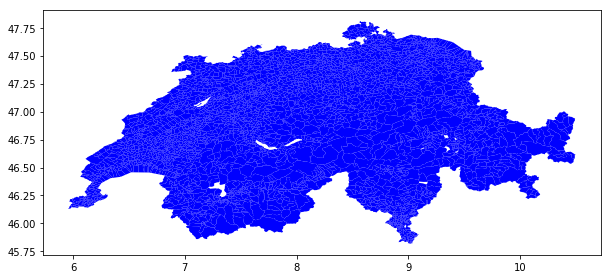

In [99]:
#Mit dieser ersten Zeile, plotten wir also alle Gemeinden der Schweiz.
#Mit der zweiten speichern wir die Karte ab.
ch.plot(figsize=(10,10), color='blue')
plt.savefig('switzerland.pdf')

In [100]:
#Nun importieren wir alle (vermeintlich) italienischen Restaurants. 
df = pd.read_csv('italrest_top10cities.csv')

In [101]:
#Wie sieht das File aus?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 6 columns):
Unnamed: 0    1838 non-null int64
Addresse      1838 non-null object
Lat           1838 non-null float64
Lng           1838 non-null float64
Name          1838 non-null object
Rating        1838 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 86.2+ KB


In [102]:
#Und wie die eigentlichen Werte?
df.head()

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating
0,0,"In Gassen 6, 8001 Zürich, Switzerland",47.370705,8.540779,Bindella,4.3
1,1,"Augustinergasse 25, 8001 Zürich, Switzerland",47.372218,8.538797,Cantinetta Antinori,4.3
2,2,"Dufourstrasse 1, 8008 Zürich, Switzerland",47.364525,8.547443,Conti,4.3
3,3,"Nansenstrasse 9, 8050 Zürich, Switzerland",47.410710,8.544784,Mamma Mia,3.9
4,4,"Zeughausstrasse 61, 8004 Zürich, Switzerland",47.376371,8.529278,Italia,4.3


In [119]:
#Was wir nun tun wollen: Alle italienischen Restaurants auf der Schweizer Karte anzeigen.
#Damit wir das tun können, müssen wir die Lat und Long Daten zu einem Punkt zusammenfassen.
#Das machen wir mit folgender Funktion. Die in der Funktion verwendete Funktion "Point"
#holen wir von Shapely. Vergleiche dafür die Funktion ganz am Anfang dieses Notebooks.
# Step 1: Funktion, um einen Punkt zu machen
def make_point(row):
    return Point(row['Lng'], row['Lat'])
#df = pd.read_csv('italrest_top10cities.csv')
# Step 2: Den Punkt machen
df['points'] = df.apply(make_point, axis=1) #Die Spalte muss geometry heissen. Sonst
                                              #Kann Geopandas nicht damit umgehen. 

In [120]:
#Das sieht 
df.head()

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating,geometry,points
0,0,"In Gassen 6, 8001 Zürich, Switzerland",47.370705,8.540779,Bindella,4.3,POINT (8.5407788 47.3707055),POINT (8.5407788 47.3707055)
1,1,"Augustinergasse 25, 8001 Zürich, Switzerland",47.372218,8.538797,Cantinetta Antinori,4.3,POINT (8.5387974 47.37221760000001),POINT (8.5387974 47.37221760000001)
2,2,"Dufourstrasse 1, 8008 Zürich, Switzerland",47.364525,8.547443,Conti,4.3,POINT (8.547442799999999 47.364525),POINT (8.547442799999999 47.364525)
3,3,"Nansenstrasse 9, 8050 Zürich, Switzerland",47.410710,8.544784,Mamma Mia,3.9,POINT (8.544783899999999 47.41071029999999),POINT (8.544783899999999 47.41071029999999)
4,4,"Zeughausstrasse 61, 8004 Zürich, Switzerland",47.376371,8.529278,Italia,4.3,POINT (8.529277699999998 47.3763708),POINT (8.529277699999998 47.3763708)


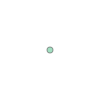

In [121]:
df['geometry'][0] 

In [127]:
#Nun müssen wir noch aus dem Pandas DF ein GeoPandas DF machen. Das geschieht so: 
italrests = gpd.GeoDataFrame(df, geometry=df['geometry'])

# Karte und Punkte: Was ist hier passiert?

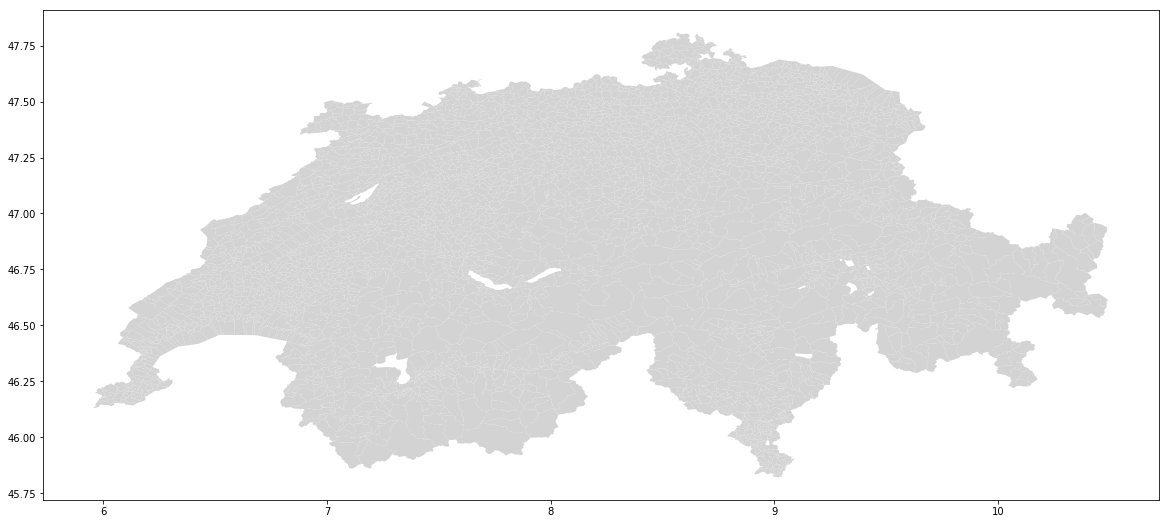

In [128]:
#Nun können wir die Schweiz ausplotten, mit der bekannten Formel. Mit "color" sage ich GeoPandas, 
#welche Farbe verwendeet werden soll.
ch.plot(figsize=(20,20), color='lightgrey')

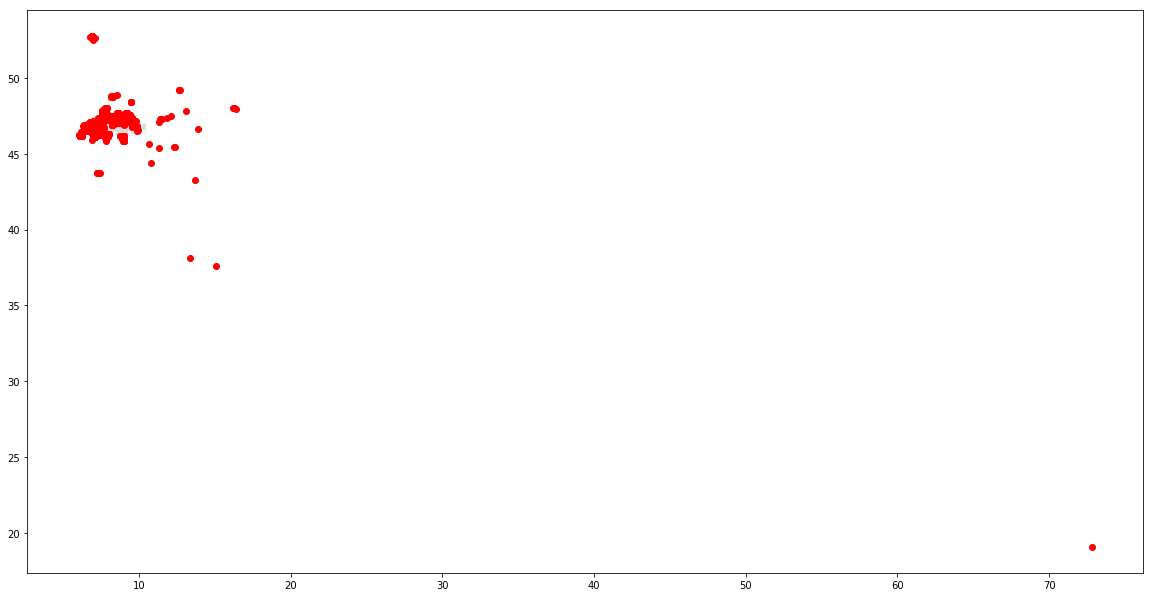

In [129]:
#Das mache ich hier nochmals. Aber nun speichere ich die Schweiz als Variabel ax ab.
#Diese Variabel kann ich nun verwenden, um als Hintergrund zu verwenden, auf denen
#die Punkte der italiensichen Restaurants geplottet werden. Aber oha, was ist denn das?
#Die Schweiz ist so klein, und es gibt einen Punkt, der schätzungsweise in Ägypten liegt?
#Wir bekommen also einen ertes Hinweis, dass diese Daten nicht so toll sind, wie 
#es auf den ersten Blick schien.
ax = ch.plot(figsize=(20,20), color='lightgrey')
df.plot(ax=ax, color='red')

# Schneiden wir die Koordinaten ab

In [130]:
#Schneiden wir das uns etwas zuerecht. Nutzen wir dazu die Breitengrade der Schweiz.
italrests = italrests[italrests['Lat'] < 48]
italrests = italrests[italrests['Lat'] > 45]
italrests = italrests[italrests['Lng']>6]
italrests = italrests[italrests['Lng']<11]

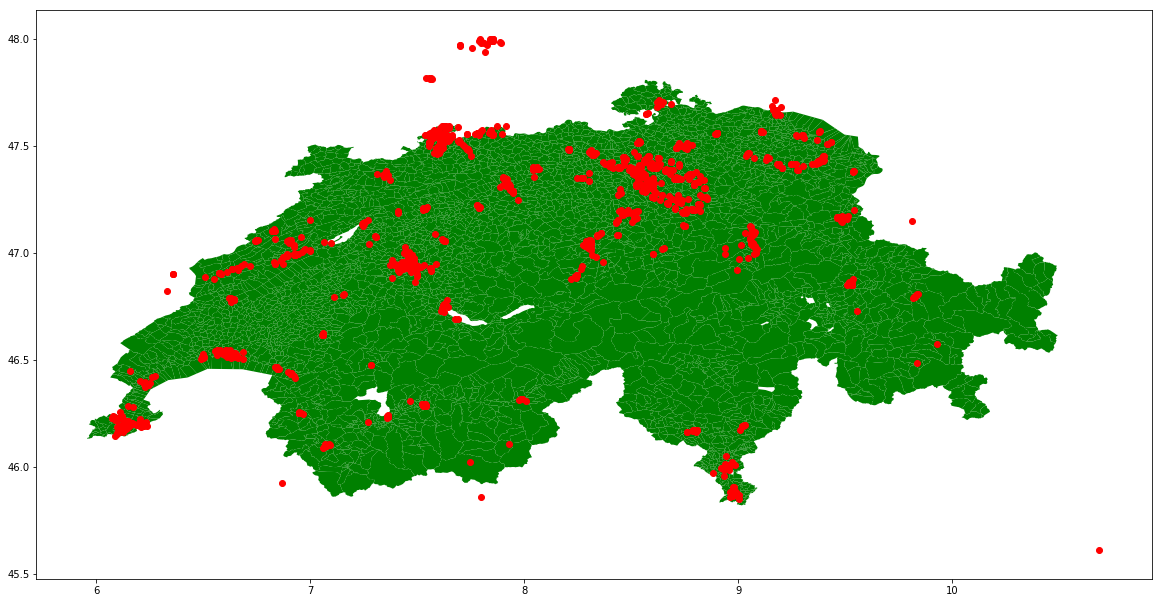

In [131]:
ax = ch.plot(figsize=(20,20), color='green')
italrests.plot(ax=ax, color='red')

# SpatialJoin

In [85]:
#Aber das geht viel besser. Wir können nämlich beide Datenstze mergen, das heisst
#Wir nehmen wirklich nur in der Schweiz liegen. Dafür sorgen wir zunächst dafür,
#dass beide Files die gleiche Projizierung haben.
ch.crs = {'init' :'epsg:4326'}
italrests.crs = {'init' :'epsg:4326'}

In [87]:
#Und nun verbinden wir die beiden Datensätzen. Mit how="inner" heisst das, dass nur noch 
#die übrig bleiben, die in beiden Datensätzen vorhanden sind. 
ch_with_italrests = gpd.sjoin(italrests, ch, how="inner", op='intersects')

In [88]:
#Wieviele sind es? Das sieht gut aus.
ch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4134 entries, 0 to 5282
Data columns (total 16 columns):
rec_art        4134 non-null object
onrp           4134 non-null float64
bfsnr          4134 non-null float64
plz_typ        4134 non-null float64
postleitzah    4134 non-null float64
plz_zz         4134 non-null object
gplz           4134 non-null float64
ortbez18       4134 non-null object
ortbez27       4134 non-null object
kanton         4134 non-null object
sprachcode     4134 non-null float64
briefz_durc    4134 non-null float64
gilt_ab_dat    4134 non-null float64
plz_briefzu    4134 non-null float64
plz_coff       4134 non-null object
geometry       4134 non-null object
dtypes: float64(9), object(7)
memory usage: 549.0+ KB


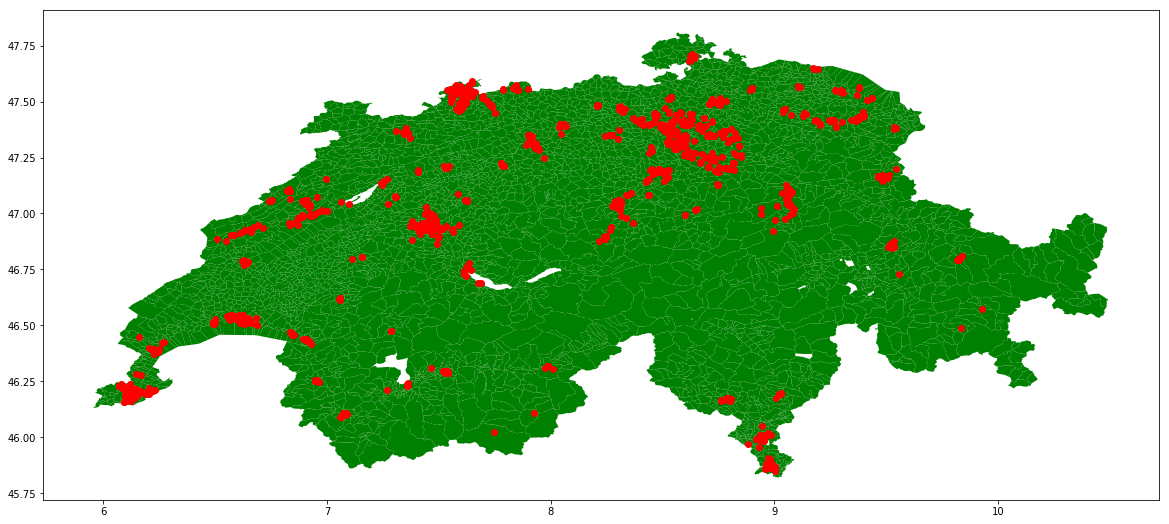

In [89]:
#Und nun plotten wir das wieder.
ax = ch.plot(figsize=(20,20), color='green')
ch_with_italrests.plot(ax=ax, color='red')

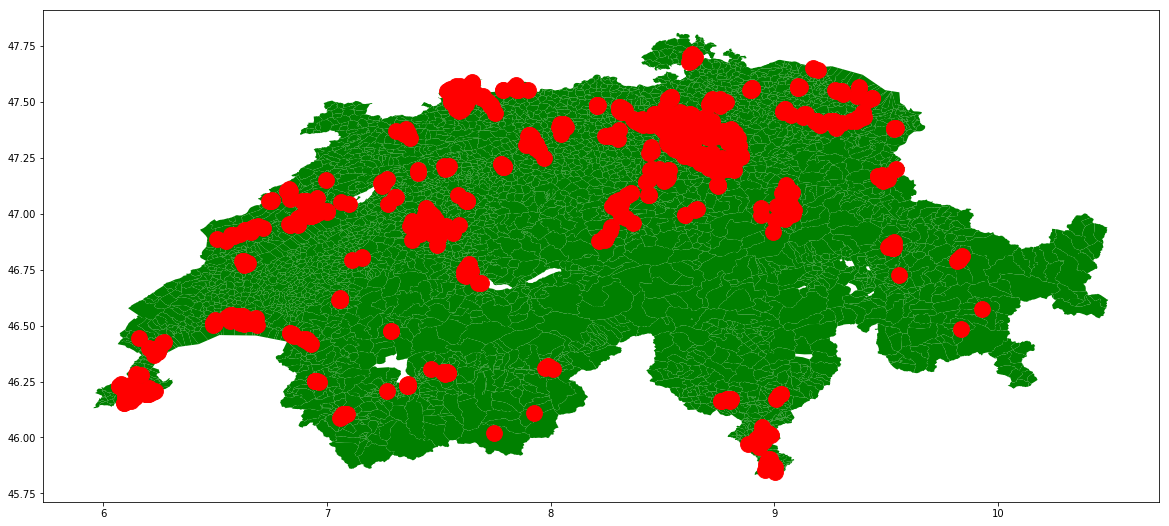

In [97]:
#Mit Marker können wir den Punkt-Typ genau bestimmen und mit Markersize, wiegross der mArket sein sollte.
ax = ch.plot(figsize=(20,20), color='green')
ch_with_italrests.plot(ax=ax, color='red', marker=".", markersize=1000)

# Schauen wir uns Zürich an

In [98]:
#Jetzt schauen wir uns noch Zürich an. Denn, so zeigt uns die KArte, dort scheint es eine Explosion
#von italienische Restaurants zu geben. Die Daten gibt es hier:
#https://statistik.zh.ch/internet/justiz_inneres/statistik/de/daten/Raeumliche_Daten/Basiskarten.html
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F/GEN_A4_GEMEINDEN_2018_F.shp")

In [99]:
#Wir sorgen für eine entsprechende Projektion.
zh.crs = {'init' :'epsg:3857'}
italrests.crs = {'init' :'epsg:3857'}

In [112]:
#Schauen wir uns die Polygone an. Oh! Diese Werte sehen ganz anders aus. Tatsächlich ist es so,
#dass die Schweiz ein anderes Koordinatensyte hat. Das ist blöd.
pd.set_option("display.max_colwidth", -1)

In [113]:
zh.head()

,BFS,NAME,BEZIRKSNAM,ART_TEXT,ART_CODE,SHAPE_Leng,SHAPE_Area,geometry
index_right,,,,,,,,
0,86,Dielsdorf,Dielsdorf,Gemeinde,1,12046.396046,5.616486e+06,"POLYGON ((2678233.626499999 1260372.840800002, 2677783.1021 1259148.008199997, 2677979.662 1258468.123899996, 2677503.2128 1258157.942100003, 2677001.521400001 1257725.542300001, 2676981.368999999 1257962.020300001, 2676663.453699999 1257583.216200002, 2676519.743700001 1258040.601800002, 2675138.976399999 1257887.7443, 2674691.136999998 1258082.452600002, 2675412.7139 1259120.479099996, 2675493.108399998 1258637.191100001, 2675758.547800001 1259231.7852, 2675973.173799999 1259214.568899997, 2675937.7797 1259846.983599998, 2676735.502099998 1260384.241400003, 2678233.626499999 1260372.840800002))"
1,213,Brütten,Winterthur,Gemeinde,1,11342.209841,6.556066e+06,"POLYGON ((2692447.137800001 1260564.256300002, 2692698.864700001 1260004.985299997, 2693111.2234 1259842.932499997, 2693611.893100001 1260377.3851, 2695069.6149 1258597.703100003, 2694737.805199999 1258256.310999997, 2693841.002500001 1258177.647799999, 2693102.016100001 1257443.093500003, 2691517.694200002 1258564.208099999, 2691760.0108 1259013.257600002, 2691476.0962 1260312.573600002, 2692061.012600001 1260624.439199999, 2692447.137800001 1260564.256300002))"
2,226,Schlatt (ZH),Winterthur,Gemeinde,1,15513.841928,8.844313e+06,"POLYGON ((2704655.376800001 1260245.353200004, 2704684.171700001 1259869.073100001, 2704932.742199998 1259648.038699999, 2705849.642000001 1259605.624600001, 2705700.9375 1259285.110200003, 2706663.8638 1258375.142499998, 2707042.120499998 1258480.824000001, 2707002.8849 1257944.344899997, 2707293.7172 1257718.926100001, 2707125.619800001 1257508.806900002, 2706608.346099999 1256874.787299998, 2706207.2564 1257183.737300001, 2706200.999400001 1257189.065499999, 2705436.318399999 1257840.225199997, 2704718.262899999 1257571.783399999, 2704183.7311 1257956.065499999, 2702558.904399998 1257998.196999997, 2702510.732099999 1258418.972900003, 2702295.3103 1258474.383400001, 2702315.766800001 1258991.537500001, 2703323.421500001 1259383.965999998, 2703307.1483 1259773.129199997, 2703027.214000002 1259968.340899996, 2703082.1303 1260179.4723, 2703297.552299999 1260124.061800003, 2703314.904599998 1260296.545599997, 2704081.7366 1260756.909000002, 2704655.376800001 1260245.353200004))"
3,90,Niederhasli,Dielsdorf,Gemeinde,1,19476.372746,1.148451e+07,"POLYGON ((2679283.133200001 1260344.441399999, 2679679.340399999 1260558.794200003, 2680047.033100002 1259764.466499999, 2679908.841400001 1259288.587800004, 2680270.693599999 1259094.413699999, 2680667.630100001 1257970.399300002, 2680913.5814 1257991.771799996, 2681099.448899999 1257725.899400003, 2681495.059500001 1257920.662600003, 2681409.706500001 1258232.055799998, 2681692.247099999 1258374.813000001, 2681845.096500002 1257649.926899999, 2681247.851100001 1257421.457699999, 2681232.892200001 1257045.4331, 2680873.601500001 1256997.5361, 2680815.337200001 1256538.291199997, 2680190.375500001 1255946.422600001, 2680150.777199998 1255512.833800003, 2679739.580899999 1255598.2535, 2679760.513999999 1256006.187100001, 2679286.582699999 1256651.6756, 2679137.328699999 1256440.064099997, 2678998.069600001 1256477.011799999, 2679018.530000001 1256929.535899997, 2677904.581999999 1257212.3653, 2677325.664299998 1257041.403200001, 2677266.634 1257251.100400001, 2677031.821899999 1257369.990099996, 2677001.521400001 1257725.542300001, 2677503.2128 1258157.942100003, 2677979.662 1258468.123899996, 2677783.1021 1259148.008199997, 2678233.626499999 1260372.840800002, 2678262.726500001 1260641.174099997, 2678433.609499998 1260617.255800001, 2678442.847399998 1260304.6074, 2678600.4945 1260344.387800001, 2678623.512600001 1260587.134400003, 2679044.644099999 1260840.016099997, 2679283.133200001 1260344.441399999))"
4,63,Lufingen,Bülach,Gemeinde,1,9651.800965,4.841958e+06,"POLYGON ((2687672.1384 1260794.119199999, 2687812.100200001 1260680.714500003, 2688002.557599999 

In [105]:
italrests.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1761 entries, 0 to 1837
Data columns (total 8 columns):
Unnamed: 0    1761 non-null int64
Addresse      1761 non-null object
Lat           1761 non-null float64
Lng           1761 non-null float64
Name          1761 non-null object
Rating        1761 non-null float64
Points        1761 non-null object
geometry      1761 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 123.8+ KB


In [100]:
#Wenn wir also diese Fils zu joinen versuchen, gibt es null Treffer.
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')

In [103]:
#Und es gibr eine Fehlermeldung.
zh_with_italrests

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating,Points,geometry,index_right,BFS,NAME,BEZIRKSNAM,ART_TEXT,ART_CODE,SHAPE_Leng,SHAPE_Area


/Users/barneyjs/.virtualenvs/master/lib/python3.5/site-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

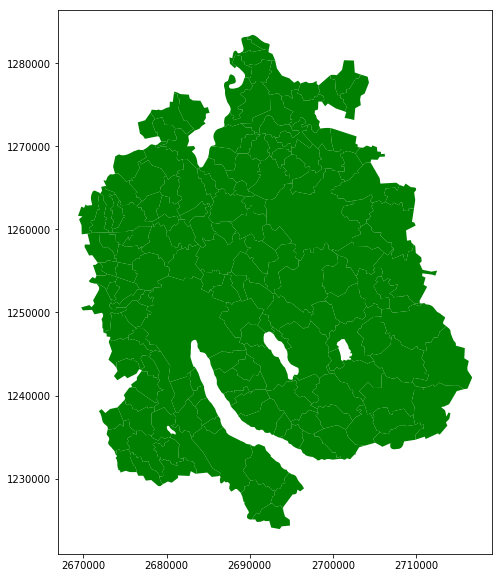

In [102]:
ax = zh.plot(figsize=(10,10), color='green')
zh_with_italrests.plot(ax=ax, color='red', marker=".", markersize=1000)

# Warum kommen hier keine Punkte vor?

In [ ]:
# Das hat mit dem Sonderfall Schweiz zu tun.
# https://github.com/ValentinMinder/Swisstopo-WGS84-LV03

In [ ]:
# Frage: Wir könnten wir damit unsere Koordinaten umwandeln?

# Ein einfacher Work Around

In [114]:
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F_WGS84_.geojson")

In [115]:
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')
zh.crs = {'init' :'epsg:4326'}
italrests.crs = {'init' :'epsg:4326'}

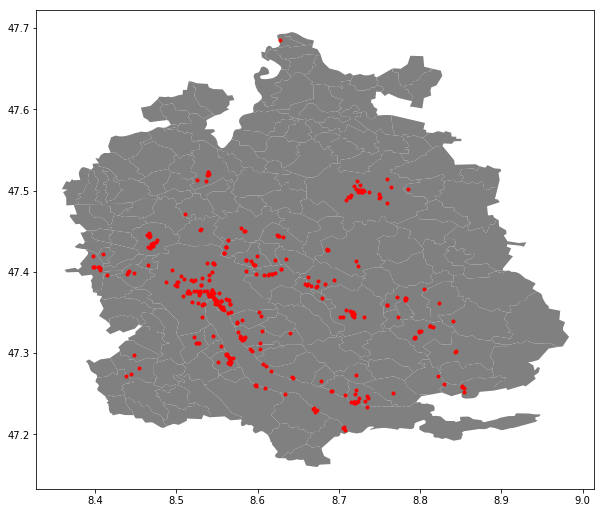

In [116]:
ax = zh.plot(figsize=(10,10), color='grey')
zh_with_italrests.plot(ax=ax, color='red', marker=".")